In [14]:
# dependencies 
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [2]:
# create engine
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [3]:
# declare base
Base = automap_base()

In [4]:
# reflect database tables
Base.prepare(engine, reflect=True)

In [5]:
# view tables 
Base.classes.keys()

['measurement', 'station']

In [6]:
# assign the each class to a variable
measurement = Base.classes.measurement
station = Base.classes.station

## Precipitation Analysis

In [7]:
# start session
session = Session(engine)

In [8]:
# find most recent date in dataset
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [9]:
# calculate the date one year from the last date in data set
dt.date(2017, 8, 23) - relativedelta(months=12)

datetime.date(2016, 8, 23)

In [10]:
# query to retrieve the previous 12 months of precipitation data
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-23', '2017-08-23')).all()
print(precipitation)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
# load query results into a Pandas DataFrame, set index to "date" column
rain_data = pd.DataFrame(precipitation).set_index('date')
rain_data

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


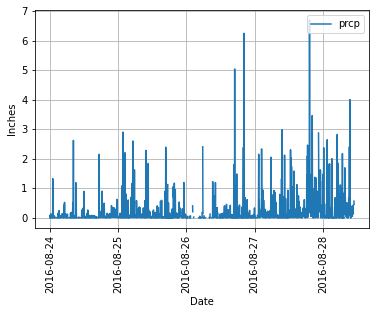

In [73]:
# plot the data
rain_plot = rain_data.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid()
rain_plot.set_xticklabels(rain_data.index, rotation=90)
rain_plot.legend(loc="upper right")

In [36]:
# summary stats of precipitation data
rain_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
